# Python Project - Crime data Exploratory Data Analysis
The Python project on Crime Data Exploratory Data Analysis (EDA) embarks on a comprehensive journey to unravel insights from crime datasets. EDA serves as a foundational step in understanding the intricacies of crime patterns, trends, and distributions. Through Python's powerful analytical capabilities, we delve into the depths of crime data, examining various attributes such as location, time, and crime types. By harnessing exploratory techniques, we aim to unearth hidden patterns, correlations, and anomalies within the data. This project not only sheds light on the dynamics of crime occurrences but also equips us with invaluable insights to inform decision-making processes, policy formulations, and resource allocations aimed at enhancing public safety and security.

## Table of Contents

5. [Analysis Phase](#analysis-phase)
   - 5.1 [Graph Creation](#graph-creation)
       - 5.1.1 [Exploring Crime Type Distribution](#exploring-crime-type-distribution)
       - 5.1.2 [Identifying Top Crimes](#identifying-top-crimes)
       - 5.1.3 [Visualizing Crime Trends Over Time](#visualizing-crime-trends-over-time) 
   - 5.2 [Deriving Insights](#deriving-insights)
       - 5.2.1 [Regional Analysis: Comparing Crime Rates](#regional-analysis-comparing-crime-rates)
       - 5.2.2 [Crime Mapping: Spatial Distribution Analysis](#crime-mapping-spatial-distribution-analysis)
       - 5.2.3 [Exploring Correlations and Anomalies](#exploring-correlations-and-anomalies)
       - 5.2.4 [Additional Perspectives: Time-based and Demographic Analyses](#additional-perspectives-time-based-and-demographic-analyses)
6. [Conclusion](#conclusion)


# 5. Analysis Phase
In this section, it's shown the analysis phase of our project, where we explore and derive insights from the crime data.

## 5.1 Graph Creation
In this section, Python's data visualization libraries such as Matplotlib and Seaborn are used to create insightful graphs and visualizations. These visualizations will aid in understanding the distribution of crime types, outcomes, and top crimes across Oxford, Cambridge and Bristol. 
A temporal analysis on the crime data is done, analyzing trends and patterns over time.

### 5.1.1 Exploring Crime Type Distribution
The distribution of different crime types to identify the most prevalent crimes in the dataset is done. This analysis will provide insights into the nature and frequency of various criminal activities.
To run the code its necessary to import all the necessary libraries and load the preprocessed dataset. a copy of the dataset is created to safeguard the integrity of the data, ensuring the original dataframe remains intact and protected against inadvertent modifications.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

# load dataset
df_original = pd.read_csv('Combined_data_EDA.csv')

# Create a copy of the dataframe
df = df_original.copy()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164061 entries, 0 to 164060
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Crime ID             164061 non-null  object 
 1   Month                164061 non-null  object 
 2   Reported by          164061 non-null  object 
 3   Longitude            164061 non-null  float64
 4   Latitude             164061 non-null  float64
 5   Location (on/ near)  152416 non-null  object 
 6   LSOA code            164061 non-null  object 
 7   LSOA name            164061 non-null  object 
 8   Crime type           164061 non-null  object 
dtypes: float64(2), object(7)
memory usage: 11.3+ MB


According to the previous table, the dataset contains 164,061 entries, indexed from 0 to 164,060. There are 9 columns in the dataset.
Regarding data types, 2 columns contain floating-point numbers (Longitude, Latitude) and 7 columns contain objects (strings).
The columns 'Crime ID', 'Month', 'Reported by', 'Longitude', 'Latitude', 'LSOA code', 'LSOA name', and 'Crime type' are complete with no missing values. The 'Location (on/near)' column has some missing values, with 152,416 non-null entries out of 164,061, despite this not being the case when analyse the data before saving it in a csv file during the pre-processing stage

The 'Location' column is likely to not be used in the Exploratory Data analysis due to the fact that the crime data possesses latitude and longitude coordinates as well as LSOA codes. Therefore, the null values will be replaced by 'Unknown'

In [3]:
# replace 'null' values in 'Location' for 'Unknown'
df['Location (on/ near)'].fillna('Unknown', inplace=True)

# Recheck the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164061 entries, 0 to 164060
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Crime ID             164061 non-null  object 
 1   Month                164061 non-null  object 
 2   Reported by          164061 non-null  object 
 3   Longitude            164061 non-null  float64
 4   Latitude             164061 non-null  float64
 5   Location (on/ near)  164061 non-null  object 
 6   LSOA code            164061 non-null  object 
 7   LSOA name            164061 non-null  object 
 8   Crime type           164061 non-null  object 
dtypes: float64(2), object(7)
memory usage: 11.3+ MB


### 5.1.2 Identifying Top Crimes
We identify and analyze the top crimes based on their frequency in the dataset. This analysis will highlight the most common criminal activities that occur within the studied regions.

In [4]:
display(df['Crime type'].value_counts().sort_values(ascending=False))

Crime type
Violence and sexual offences    53562
Public order                    17768
Anti-social behaviour           15629
Shoplifting                     14170
Criminal damage and arson       13132
Other theft                     12957
Vehicle crime                   12265
Burglary                         6660
Bicycle theft                    6630
Drugs                            3106
Theft from the person            2473
Robbery                          2317
Other crime                      2200
Possession of weapons            1192
Name: count, dtype: int64

The dataset presents a breakdown of crime types along with their respective occurrence frequencies. The most prevalent crime type, 'Violence and sexual offences', accounts for a substantial portion of the data, with a count of 53,562 instances across the 3 cities. Following this, 'Public order' and 'Anti-social behaviour' rank as the next most frequent crime types, with occurrence counts of 17,768 and 15,629, respectively. 'Shoplifting' and 'Criminal damage and arson' also feature prominently in the dataset, with occurrence counts of 14,170 and 13,132, respectively. Other notable crime types include 'Other theft' (12,957 occurrences) and 'Vehicle crime' (12,265 occurrences). Less prevalent crime types include 'Burglary' (6,660 occurrences), 'Bicycle theft' (6,630 occurrences), and 'Drugs' (3,106 occurrences). 'Theft from the person', 'Robbery', 'Other crime', and 'Possession of weapons' round out the list with fewer instances.



### 5.1.2 Analyzing type of crime Distribution
Examining the distribution of crime types reported provides valuable insights for real estate assessment. Understanding the prevalence of different types of crimes in an area is essential for evaluating the safety and security of neighborhoods. This analysis allows real estate professionals to gauge the overall security environment and make informed decisions regarding property investments and market assessments.

To simplify the analysis per city, 3 dataframes are created for each city (oxford_data, cambridge_data, bristol_data)

In [5]:
# Create DataFrames for each city based on 'LSOA name'
oxford_data = df[df['LSOA name'].str.contains('Oxford', case=False, na=False)]
cambridge_data = df[df['LSOA name'].str.contains('Cambridge', case=False, na=False)]
bristol_data = df[df['LSOA name'].str.contains('Bristol', case=False, na=False)]

print("DataFrames created and saved:")
print(f"Oxford: {len(oxford_data)} rows")
print(f"Cambridge: {len(cambridge_data)} rows")
print(f"Bristol: {len(bristol_data)} rows")

DataFrames created and saved:
Oxford: 31570 rows
Cambridge: 28781 rows
Bristol: 103710 rows


### 5.1.3 Visualizing Crime Trends Over Time
In this section, we delve into visualizing crime trends over time. By examining how crime rates fluctuate across different time periods, we can gain valuable insights into the dynamics of criminal activity within the studied regions. Through graphical representations, we aim to elucidate patterns, identify potential correlations, and extract meaningful trends that may inform law enforcement strategies and community interventions.

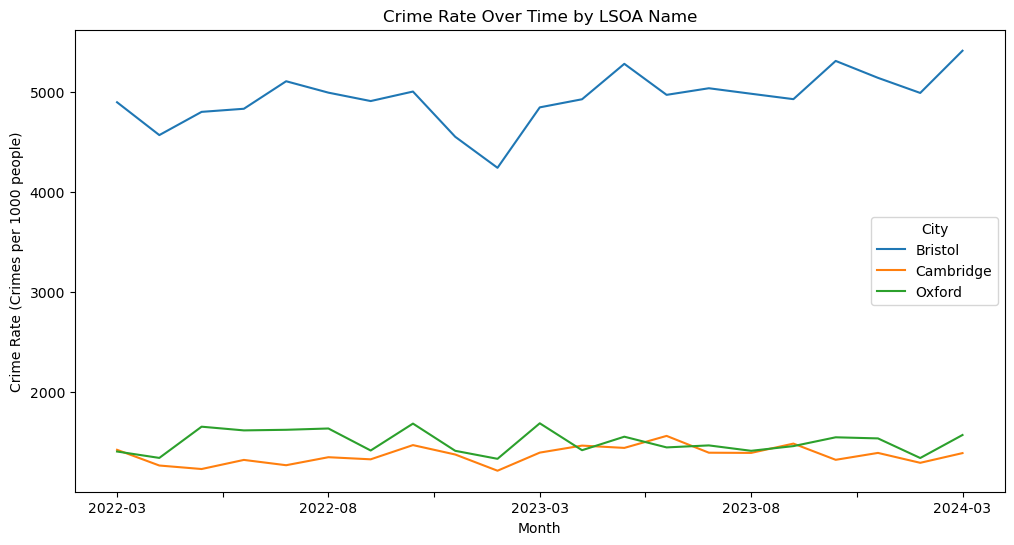

In [8]:
# Define population for each city and year
population_data = {
    'Cambridge': {2022: 149155, 2023: 150500, 2024: 151850},
    'Bristol': {2022: 472400, 2023: 477600, 2024: 475000},
    'Oxford': {2022: 162100, 2023: 163800, 2024: 165500}
}

# Function to normalize crime counts by population
def normalize_crime_counts(dataframe, city_name):
    city_population = sum(population_data[city_name].values())  # Total population for all years
    
    # Filter dataframe for the specified city
    city_data = dataframe[dataframe['LSOA name'].str.contains(city_name, case=False, na=False)]
    
    # Calculate crime counts for each crime type
    crime_counts = city_data['Crime type'].value_counts()
    
    # Normalize crime counts by total population
    normalized_counts = crime_counts / city_population
    
    return normalized_counts

# Normalize LSOA names in the copy by extracting the main city names (Oxford, Cambridge, Bristol)
df['LSOA name'] = df['LSOA name'].str.extract(r'(Oxford|Cambridge|Bristol)', expand=False)

# Define a dictionary to store normalized crime rates for each city
normalized_rates = {}

# Loop through each city and normalize the crime counts
for city_name in ['Oxford', 'Cambridge', 'Bristol']:
    normalized_counts = normalize_crime_counts(df, city_name)
    # Get the corresponding population for the city
    city_population = sum(population_data[city_name].values())  # Total population for all years
    # Calculate the crime rate (crimes per 1000 people)
    normalized_rates[city_name] = (normalized_counts / city_population) * 1000

# Create a DataFrame from the normalized rates dictionary
normalized_df = pd.DataFrame(normalized_rates)

# Group by Month and the normalized LSOA name, and count the number of crimes
grouped_df = df.groupby(['Month', 'LSOA name']).size().unstack().fillna(0)

# Plot the data
plt.figure(figsize=(12, 6))
grouped_df.plot(kind='line', ax=plt.gca())
plt.title('Crime Rate Over Time by LSOA Name')
plt.xlabel('Month')
plt.ylabel('Crime Rate (Crimes per 1000 people)')
plt.legend(title='City')
plt.show()


This graph doesn't offer significant insights beyond the observation that Bristol experiences notably higher crime rates compared to Oxford and Cambridge. Unfortunately, attempts to normalize the data were unsuccessful.

## 5.2 Deriving Insights
In this section, we delve deeper into the dataset to extract meaningful insights and patterns related to crime. Through various analytical approaches, we aim to gain a comprehensive understanding of crime dynamics within the studied regions.

### 5.2.1 Regional Analysis: Comparing Crime Rates
This subsection focuses on analyzing crime rates across different regions, such as Oxford, Cambridge, and Bristol. By comparing and contrasting crime data, we aim to uncover regional trends and variations, shedding light on the relative safety and security levels in each area.

Since each reagion has a different population size, it's important to normalize the amount of crimes. The normalization was done according to the references:
Estimate population for:
- Cambridge: https://cambridgeshireinsight.org.uk/population/population-forecasts/
    - 2022 - 149,155 residents 
    - 2023 - 150,500 residents
    - 2024 - 151,850​ residents

- Bristol - https://worldpopulationreview.com/world-cities/bristol-population
    - 2022 - 472,400 residents 
    - 2023 - 477,600 residents
    - 2024 - 475,000 residents

- Oxford - https://www.oxford.gov.uk/population-statistics/oxfords-population
    - 2022 - 162,100 residents 
    - 2023 - 163,800 residents
    - 2024 - 165,500 residents
 

The crime rate per crime type refers to the frequency of occurrence of a particular type of crime relative to a specific population size or time period (in this case between March 2022 and March 2024). It is a measure used to understand the prevalence of different types of crimes within a given population or over a certain period.

In the context of this analysis, the crime rate per crime type is calculated by dividing the number of occurrences of each crime type by a population metric (in this case the average population across multiple years). This normalization allows for a comparison of crime frequencies across different cities, accounting for variations in population size.

By normalizing the crime counts by population, we can assess the relative impact of different types of crimes on a population, identify trends or patterns in crime distribution, and make more accurate comparisons between different geographical areas or time frames. It provides insight into which types of crimes are more prevalent or have a higher impact on the community, helping to inform decision-making processes related to law enforcement, public safety, and resource allocation.

This code will compute the average population for each city across the three years, and then normalize the crime counts by this average population. Finally, it will plot the top crime types normalized by the average population for each city.

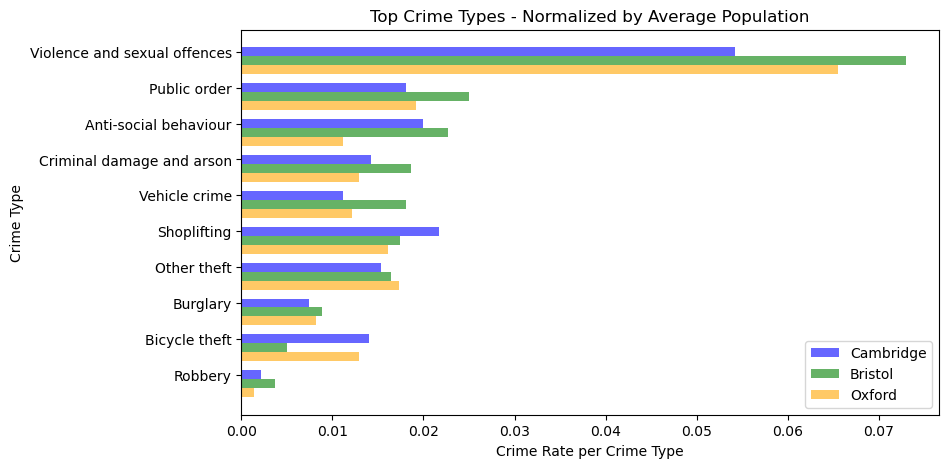

In [9]:
# Function to normalize crime counts by population
def normalize_crime_counts(dataframe, city_name):
    """
    Normalize the counts of each crime type by the average population of the city across three years.

    Args:
    - dataframe (DataFrame): Input DataFrame containing crime data.
    - city_name (str): Name of the city for which crime counts need to be normalized.

    Returns:
    - normalized_counts (Series): Series containing normalized crime counts for each crime type.
    """
    # Compute the average population for the city across the three years
    city_population_avg = sum(population_data[city_name].values()) / len(population_data[city_name])

    # Filter dataframe for the specified city
    city_data = dataframe[dataframe['LSOA name'].str.contains(city_name, case=False, na=False)]
    
    # Calculate crime counts for each crime type
    crime_counts = city_data['Crime type'].value_counts()
    
    # Normalize crime counts by average population
    normalized_counts = crime_counts / city_population_avg
    
    return normalized_counts

# Define population for each city and year
population_data = {
    'Cambridge': {2022: 149155, 2023: 150500, 2024: 151850},
    'Bristol': {2022: 472400, 2023: 477600, 2024: 475000},
    'Oxford': {2022: 162100, 2023: 163800, 2024: 165500}
}

# Plot normalized top crime types for each city
fig, ax = plt.subplots(figsize=(9, 5))

colors = ['blue', 'green', 'orange']  # Assign colors to cities
bar_width = 0.25  # Width of each bar

# Get the top crime types in Bristol
bristol_data = df[df['LSOA name'].str.contains('Bristol', case=False, na=False)]
bristol_crime_counts = bristol_data['Crime type'].value_counts().nlargest(10)

for i, city in enumerate(population_data.keys()):
    normalized_counts = normalize_crime_counts(df, city)
    
    # Sort the crime counts according to the order in Bristol
    normalized_counts_sorted = normalized_counts.reindex(bristol_crime_counts.index)
    
    positions = np.arange(len(normalized_counts_sorted)) + i * bar_width  # Adjust position for each city
    plt.barh(positions, normalized_counts_sorted, bar_width, color=colors[i], alpha=0.6, label=city)

plt.title('Top Crime Types - Normalized by Average Population')
plt.xlabel('Crime Rate per Crime Type')
plt.ylabel('Crime Type')
plt.yticks(np.arange(len(normalized_counts_sorted)), normalized_counts_sorted.index)
plt.gca().invert_yaxis()
plt.legend()
plt.show()


__Comparing crime rates and crime trends:__ ased on the bar lengths depicted in the graph, it's evident that 'Violence and sexual offences' emerge as the most prevalent crime type across all three cities. However, beyond this overarching trend, the most common crime types vary across each city.

In Cambridge, 'Shoplifting', 'Anti-social behaviour', and 'Public order' rank as the next most prevalent crime types, listed in decreasing order of occurrence. Conversely, in Oxford, the top three prevalent crime types, in descending order, are 'Public order', 'Other theft', and 'Shoplifting'.

Meanwhile, Bristol exhibits a different pattern, with 'Public order', 'Anti-social behaviour', and 'Criminal damage and arson' emerging as the most prevalent crime types, again in descending order of occurrence.

__Impact of Population:__ Normalizing the crime count by average population helps in accounting for hte size of each city, enabling fairer comparisons between cities of different sizes.

### 5.2.2 Crime Mapping: Spatial Distribution Analysis
In this part, we employ spatial visualization techniques to map the distribution of crimes across geographical areas. By visualizing crime hotspots and patterns, we can identify areas with higher concentrations of criminal activities, facilitating targeted law enforcement efforts and urban planning strategies.

Understanding the spatial distribution of crime types in each city is crucial for both community safety and the real estate market. By visualizing where different types of crimes occur most frequently, we can identify patterns and potential hotspots, providing valuable insights for homebuyers, real estate investors, and policymakers.

#### Oxford
Initially, a Choropleth map was done to understand which LSOA codes have the highest density of crimes.
Taking into account that city centers have a highest population density and therefore more crimes, an external dataset containg the estimate population per LSOA code was introduced to normalise these values.

<Figure size 1000x1000 with 0 Axes>

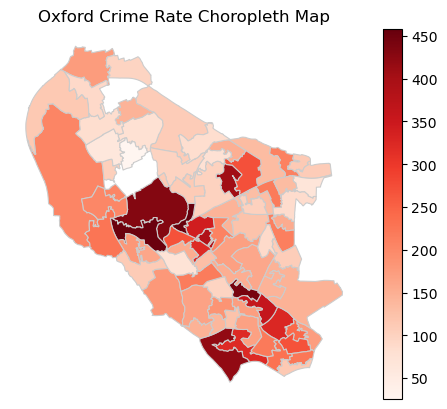

In [12]:
# Group data by LSOA code/name and count the number of crimes
oxford_crime_count = oxford_data.groupby('LSOA code').size().reset_index(name='Crime Count')
cambridge_crime_count = cambridge_data.groupby('LSOA code').size().reset_index(name='Crime Count')
bristol_crime_count = bristol_data.groupby('LSOA code').size().reset_index(name='Crime Count')
# Load the Shapefile
shapefile_path = "LSOA_2001_EW_BFC_V2.shp"
shapefile = gpd.read_file(shapefile_path)

# Load population density data
population_density_path = "NormalisedPopulation2021-2022.xlsx"
population_density_df = pd.read_excel(population_density_path, sheet_name='Mid-2022 LSOA 2021', skiprows=3)
population_density_df.rename(columns={'LSOA 2021 Code': 'LSOA code', 'Mid-2022 population': 'Population'}, inplace=True)

# Filter crime data by LSOA names containing the city name
city_name = 'Oxford'
oxford_lsoa_names = population_density_df[population_density_df['LSOA 2021 Name'].str.contains(city_name, case=False, na=False)]['LSOA code']
oxford_data_filtered = oxford_data[oxford_data['LSOA code'].isin(oxford_lsoa_names)]

# Calculate average population for the filtered LSOA names
average_population = population_density_df[population_density_df['LSOA code'].isin(oxford_lsoa_names)]['Population'].mean()

# Calculate crime rate for each LSOA
crime_rates = []
for lsoa_code, lsoa_group in oxford_data_filtered.groupby('LSOA code'):
    population = population_density_df[population_density_df['LSOA code'] == lsoa_code]['Population'].iloc[0]
    crime_count = len(lsoa_group)
    crime_rate = (crime_count / population) * 1000 if not pd.isnull(population) else (crime_count / average_population) * 1000
    crime_rates.append({'LSOA code': lsoa_code, 'Crime Rate': crime_rate})

# Create DataFrame for crime rates
crime_rates_df = pd.DataFrame(crime_rates)

# Merge crime count with population density data using left join on LSOA code
crime_pop_merged = pd.merge(oxford_crime_count, population_density_df, on='LSOA code', how='left')

# Calculate the crime rate (crimes per 1000 people)
crime_pop_merged['Crime Rate'] = (crime_pop_merged['Crime Count'] / crime_pop_merged['Population']) * 1000

# Fill missing values in Crime Rate column with average population for LSOA names containing the city name
average_population = population_density_df[population_density_df['LSOA 2021 Name'].str.contains('Oxford', case=False)]['Population'].mean()
crime_pop_merged['Crime Rate'].fillna((crime_pop_merged['Crime Count'] / average_population) * 1000, inplace=True)

# Merge the shapefile with the crime rate data
oxford_merged = shapefile.merge(crime_pop_merged, left_on='LSOA01CD', right_on='LSOA code', how='left')

# Plot the Choropleth Map
plt.figure(figsize=(10, 10))
oxford_merged.plot(column='Crime Rate', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Oxford Crime Rate Choropleth Map')
plt.axis('off')
plt.show()

To gain deeper insights into the nature of criminal activities in these regions, a cluster map was generated. This map utilizes colored markers to differentiate between different types of crimes within each area.

In [ ]:
# Function to create a clustered map for a city with labeled crime types and LSOA code
def create_clustered_map(city_data, city_name):
    # Initialize a Folium map centered around the city's average latitude and longitude
    city_map = folium.Map(location=[city_data['Latitude'].mean(), city_data['Longitude'].mean()], zoom_start=12)

    # Create a MarkerCluster layer to handle clustering of markers that are close to each other
    marker_cluster = folium.plugins.MarkerCluster().add_to(city_map)
    
    # Define a color mapping dictionary for different crime types
    color_mapping = {
        'Anti-social behaviour': 'blue',
        'Drugs': 'green',
        'Other theft': 'red',
        'Vehicle crime': 'orange',
        'Violence and sexual offences': 'purple',
        'Criminal damage and arson': 'yellow',
        'Public order': 'pink',
        'Possession of weapons': 'brown',
        'Burglary': 'gray',
        'Shoplifting': 'cyan',
        'Bicycle theft': 'lime',
        'Other crime': 'magenta',
        'Theft from the person': 'navy',
        'Robbery': 'olive'
    }
    
    # Create a legend with colored markers and crime type names
    legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 10px; width: 180px; height: auto; 
                border:1px solid grey; z-index:9999; font-size:12px;
                background-color:white; padding: 5px;">
    <h4 style="margin: 5px;">Crime Type Legend</h4>
    <ul style="list-style-type:none; padding: 0; margin: 0;">
    '''
    # Append each crime type and its corresponding color to the legend
    for crime_type, color in color_mapping.items():
        legend_html += f'<li><span style="background-color:{color}; width: 10px; height: 10px; display: inline-block; border-radius: 50%; margin-right: 8px;"></span>{crime_type}</li>'
    legend_html += '</ul></div>'
    
    # Add the legend to the map
    city_map.get_root().html.add_child(folium.Element(legend_html))
    
    # Add markers for each crime type in the city_data DataFrame
    for idx, row in city_data.iterrows():
        crime_type = row['Crime type']
        color = color_mapping.get(crime_type, 'black')  # Default to black if color is not defined
        
        # Construct popup information with crime type and Crime ID
        popup_info = f'Crime Type: {crime_type}<br>Crime ID: {row["Crime ID"]}'
        
        # Add a marker to the cluster with the corresponding color and popup information
        folium.Marker(location=[row['Latitude'], row['Longitude']], 
                      popup=popup_info,
                      icon=folium.Icon(color=color)).add_to(marker_cluster)

    return city_map


# Create clustered scatter plot for each city with labeled crime types and LSOA code
oxford_cluster_map = create_clustered_map(oxford_data, 'Oxford')


In [ ]:
oxford_cluster_map

The earlier map illustrates clusters of crime occurrences. Upon zooming in, it becomes possible to discern the specific locations where the crimes were committed. The markers are displayed in various colors, each corresponding to a different crime type. Clicking on a marker reveals additional information, including the crime type and its associated crime ID.

The same logic was used to analyse Cambridge and Bristol.

#### Cambridge

In [ ]:
# Merge crime count with population density data
cambridge_crime_count = cambridge_data.groupby('LSOA code').size().reset_index(name='Crime Count')
crime_pop_merged = pd.merge(cambridge_crime_count, population_density_df, on='LSOA code', how='left')

# Filter crime data by LSOA names containing the city name
city_name = 'Cambridge'
cambridge_lsoa_names = population_density_df[population_density_df['LSOA 2021 Name'].str.contains(city_name, case=False, na=False)]['LSOA code']
cambridge_data_filtered =cambridge_data[cambridge_data['LSOA code'].isin(cambridge_lsoa_names)]

# Calculate average population for the filtered LSOA names
average_population = population_density_df[population_density_df['LSOA code'].isin(cambridge_lsoa_names)]['Population'].mean()

# Calculate crime rate for each LSOA
crime_rates = []
for lsoa_code, lsoa_group in cambridge_data_filtered.groupby('LSOA code'):
    population = population_density_df[population_density_df['LSOA code'] == lsoa_code]['Population'].iloc[0]
    crime_count = len(lsoa_group)
    crime_rate = (crime_count / population) * 1000 if not pd.isnull(population) else (crime_count / average_population) * 1000
    crime_rates.append({'LSOA code': lsoa_code, 'Crime Rate': crime_rate})

# Create DataFrame for crime rates
crime_rates_df = pd.DataFrame(crime_rates)

# Merge crime count with population density data using left join on LSOA code
crime_pop_merged = pd.merge(cambridge_crime_count, population_density_df, on='LSOA code', how='left')

# Calculate the crime rate (crimes per 1000 people)
crime_pop_merged['Crime Rate'] = (crime_pop_merged['Crime Count'] / crime_pop_merged['Population']) * 1000

# Fill missing values in Crime Rate column with average population for LSOA names containing the city name
average_population = population_density_df[population_density_df['LSOA 2021 Name'].str.contains('Cambridge', case=False)]['Population'].mean()
crime_pop_merged['Crime Rate'].fillna((crime_pop_merged['Crime Count'] / average_population) * 1000, inplace=True)

# Merge the shapefile with the crime rate data
cambridge_merged = shapefile.merge(crime_pop_merged, left_on='LSOA01CD', right_on='LSOA code', how='left')

# Plot the Choropleth Map
plt.figure(figsize=(10, 10))
cambridge_merged.plot(column='Crime Rate', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Cambridge Crime Rate Choropleth Map')
plt.axis('off')
plt.show()


In [ ]:
# Create clustered scatter plot for each city with labeled crime types and LSOA code
cambridge_cluster_map = create_clustered_map(cambridge_data, 'Cambridge')

In [ ]:
# Show the map
cambridge_cluster_map

####  Bristol

In [ ]:
# Merge crime count with population density data
bristol_crime_count = bristol_data.groupby('LSOA code').size().reset_index(name='Crime Count')
crime_pop_merged = pd.merge(bristol_crime_count, population_density_df, on='LSOA code', how='left')

# Filter crime data by LSOA names containing the city name
city_name = 'Bristol'
bristol_lsoa_names = population_density_df[population_density_df['LSOA 2021 Name'].str.contains(city_name, case=False, na=False)]['LSOA code']
bristol_data_filtered =bristol_data[bristol_data['LSOA code'].isin(bristol_lsoa_names)]

# Calculate average population for the filtered LSOA names
average_population = population_density_df[population_density_df['LSOA code'].isin(bristol_lsoa_names)]['Population'].mean()

# Calculate crime rate for each LSOA
crime_rates = []
for lsoa_code, lsoa_group in cambridge_data_filtered.groupby('LSOA code'):
    population = population_density_df[population_density_df['LSOA code'] == lsoa_code]['Population'].iloc[0]
    crime_count = len(lsoa_group)
    crime_rate = (crime_count / population) * 1000 if not pd.isnull(population) else (crime_count / average_population) * 1000
    crime_rates.append({'LSOA code': lsoa_code, 'Crime Rate': crime_rate})

# Create DataFrame for crime rates
crime_rates_df = pd.DataFrame(crime_rates)

# Merge crime count with population density data using left join on LSOA code
crime_pop_merged = pd.merge(bristol_crime_count, population_density_df, on='LSOA code', how='left')

# Calculate the crime rate (crimes per 1000 people)
crime_pop_merged['Crime Rate'] = (crime_pop_merged['Crime Count'] / crime_pop_merged['Population']) * 1000

# Fill missing values in Crime Rate column with average population for LSOA names containing the city name
average_population = population_density_df[population_density_df['LSOA 2021 Name'].str.contains('Cambridge', case=False)]['Population'].mean()
crime_pop_merged['Crime Rate'].fillna((crime_pop_merged['Crime Count'] / average_population) * 1000, inplace=True)

# Merge the shapefile with the crime rate data
bristol_merged = shapefile.merge(crime_pop_merged, left_on='LSOA01CD', right_on='LSOA code', how='left')

# Plot the Choropleth Map
plt.figure(figsize=(10, 10))
bristol_merged.plot(column='Crime Rate', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Bristol Crime Rate Choropleth Map')
plt.axis('off')
plt.show()

In [ ]:
# Create clustered scatter plot for each city with labeled crime types and LSOA code
bristol_cluster_map = create_clustered_map(bristol_data, 'Bristol')

In [ ]:
bristol_cluster_map

# 6. Conclusion
In this project we can see the crime rates by crime types in Bristol, Cambridge and Oxford. This will help the real estate company in making decision on where to invest.

Property Valuation: Neighborhoods with lower crime rates tend to be perceived as safer and more desirable, often leading to higher property values. Homebuyers are typically willing to pay a premium for homes located in areas with lower crime rates, viewing them as safer investments with potentially higher resale value.

Risk Assessment: Understanding the distribution of crime rates across different neighborhoods is crucial for property investors to assess investment risk. Areas with higher crime rates may pose greater risks in terms of property damage, tenant safety, and legal liabilities. Investors should prioritize properties in low-crime areas to mitigate these risks and safeguard their investments.

Rental Demand: Rental properties situated in neighborhoods with lower crime rates are likely to attract more tenants, especially families and young professionals who prioritize safety and security. The higher demand for rental properties in low-crime areas can result in lower vacancy rates and potentially higher rental income for landlords, making such investments more lucrative in the long run.

